In [1]:
import pandas as pd 

In [13]:
data=pd.read_csv("cancer.csv")

In [14]:
data.head()

,id,diagnosis,radius_1ean,texture_1ean,peri1eter_1ean,area_1ean,s1oothness_1ean,co1pactness_1ean,concavity_1ean,concave points_1ean,...,radius_worst,texture_worst,peri1eter_worst,area_worst,s1oothness_worst,co1pactness_worst,concavity_worst,concave points_worst,sy11etry_worst,fractal_di1ension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
import matplotlib.pyplot as plt

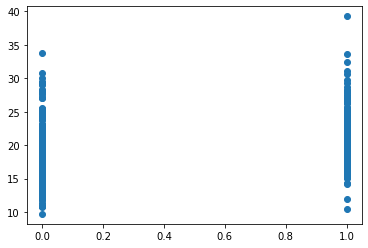

In [16]:
plt.scatter(data.iloc[:,1],data.iloc[:,3])

In [17]:
from sklearn.ensemble import IsolationForest

In [25]:
clf=IsolationForest(contamination=0.2)

In [26]:
clf.fit(data)

F:\conda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.2)

In [27]:
pred=clf.predict(data)

In [28]:
import numpy as np 

In [29]:
chk=np.where(pred<0)

In [31]:
x=data.values

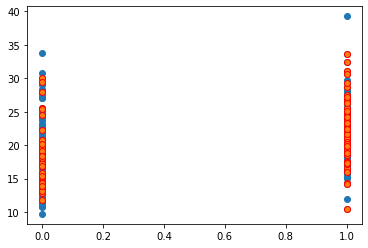

In [33]:
plt.scatter(data.iloc[:,1],data.iloc[:,3])
plt.scatter(x[chk,1],x[chk,3],edgecolors='r')

In [34]:
from sklearn.datasets import make_circles

In [35]:
X,Y=make_circles(n_samples=750,factor=0.3,noise=0.1)

In [36]:
X

array([[ 0.43673365,  0.97158332],
       [ 0.97217744, -0.32215608],
       [-0.08174579, -0.37823784],
       ...,
       [-0.2545311 ,  0.05494672],
       [-0.25490322, -0.06084155],
       [-0.17800007, -0.87233744]])

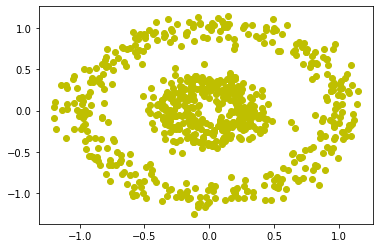

In [38]:
plt.scatter(X[:,0],X[:,1],c='y')

In [39]:
from sklearn.cluster import DBSCAN

In [40]:
db=DBSCAN(eps=0.10)

In [41]:
db.fit_predict(X)

array([ 0,  1,  2,  5,  2,  2,  1,  2,  2,  2,  3,  1,  4,  2,  4,  2,  5,
        5,  2,  6,  2,  2,  6,  2,  2,  5,  7,  5,  2,  2,  2,  2,  2,  2,
        8,  2,  2,  5, -1,  2,  1,  2,  5,  0,  2, -1,  2,  5,  1,  2,  2,
        2,  2,  4,  0,  2,  5,  2,  2,  2,  2,  2, -1,  3,  9,  2,  2, -1,
        5,  5,  5,  4,  5,  8,  3, 10,  2,  3,  2,  2,  2,  2,  2,  1,  2,
        4,  2,  7,  2,  2,  2,  9,  2,  2,  0,  5,  2,  5,  2,  2,  2,  2,
       14,  2,  8,  2,  1,  2,  8,  2,  2,  5,  1, 11, 15,  2,  2,  1,  2,
        2,  2,  2,  8,  2,  2, -1,  8,  3,  2,  6,  8, 10,  2,  9, -1, 15,
        2,  4,  2,  1, -1,  2,  2,  2, -1, 10,  0,  2,  2,  4,  2,  2,  2,
        1,  2,  2,  2,  2,  6, 10,  7,  3,  2,  2, 10,  7,  5,  5,  2,  2,
        2,  5, -1, 12, 12,  1,  2,  2,  2,  2,  1,  1,  2,  2,  1,  2,  2,
       11,  2,  2,  2,  5, 13, -1,  2,  4,  2, 13, -1,  2,  2,  2,  2,  2,
        2,  5,  0,  2,  7,  2,  2,  2,  1,  2,  9,  2,  9,  2,  2,  1,  2,
       11,  2,  4,  2, -1

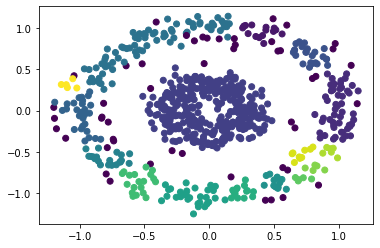

In [42]:
plt.scatter(X[:,0],X[:,1],c=db.labels_)

In [43]:
from sklearn.neighbors import LocalOutlierFactor

In [51]:
loc=LocalOutlierFactor(n_neighbors=20,algorithm='auto',contamination=0.1)

In [56]:
df=loc.fit_predict(X)

In [58]:
sc=loc.negative_outlier_factor_

In [59]:
cp=plt.cm.get_cmap('coolwarm')

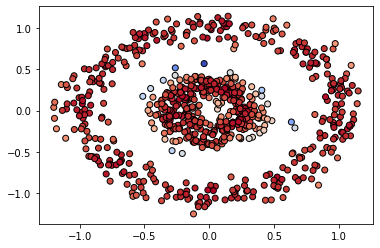

In [61]:
plt.scatter(X[:,0],X[:,1],c=sc,cmap=cp,edgecolors='k')

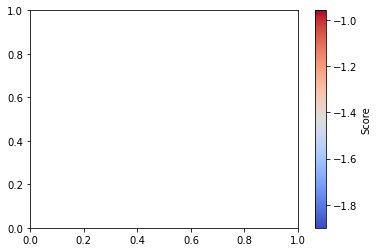

In [63]:
sm=plt.cm.ScalarMappable(cmap=cp,norm=plt.Normalize(min(sc),max(sc)))
sm.set_array([])
plt.colorbar(sm,label='Score')
plt.show()